Artifitial States Builder
====
Created on Sat Feb 20 15:02:38 2016
@author: liujun

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

V = -11 eV /27.211 : the bottom of energy level

In [20]:
V = -11/27.211
data = np.loadtxt('energy_50k.txt')
data.view('i8,f8,f8').sort(order=['f2'], axis=0)
(n_, m_) = data.shape
weight_index = 1. / 100000
index = np.arange(n_).astype(np.float32) / n_ * weight_index
energy = data[:,2]
energy = energy - V 
dtype = [('index', np.float32), ('energy', np.float32)]
train_data = np.column_stack( (index ,energy)) 
labels = data[:,0].astype(np.int32)

(index, energy) using KNN

In [21]:
cf = KNeighborsClassifier(n_neighbors = 1)
cf.fit(train_data,labels)##train_data

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [22]:
de = -V / (n_+1)
test_energy = (np.arange(n_).astype(np.float32) +1)* de

test_data = np.column_stack((index, test_energy))

test_labels = cf.predict(test_data) ##test_data

In [23]:
def convolute(energy, labels, sig):
    out_ene = (np.arange(labels.shape[0]).astype(np.float32) +1)* de
    dos = labels *2 +1    
    out_dos = range(labels.shape[0])
    for i in range(n_):    
        out_dos += dos[i] * np.exp(- ((out_ene - energy[i])**2) / sig / sig)
    return out_ene, out_dos

In [33]:
conv_energy , conv_dos = convolute(energy,labels,-V/10)
conv_energy , conv_dos_test = convolute(test_energy,test_labels,-V/10)

In [25]:
np.savetxt('dos.txt', np.column_stack((energy, labels)))
np.savetxt('dos_test.txt', np.column_stack((test_energy, test_labels)))

<Container object of 3 artists>

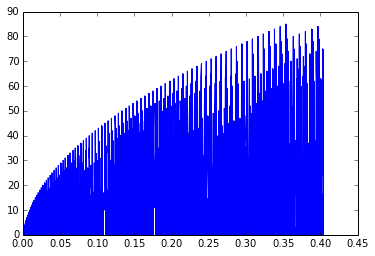

In [26]:
plt.stem(energy, labels,linefmt='b-', markerfmt='', basefmt='r-')

<Container object of 3 artists>

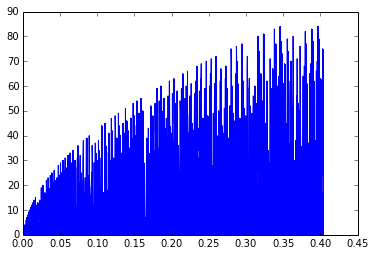

In [27]:
plt.stem(test_energy, test_labels,linefmt='b-', markerfmt='', basefmt='r-')

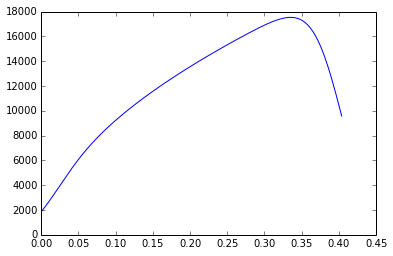

In [34]:
plt.plot(conv_energy, conv_dos)

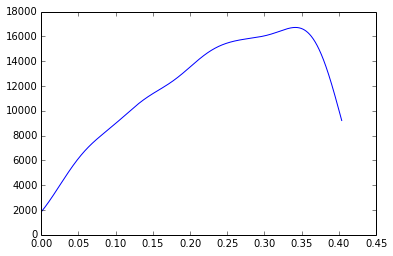

In [35]:
plt.plot(conv_energy, conv_dos_test)

In [36]:
np.savetxt('dos_conv.txt', np.column_stack((conv_energy, conv_dos)))
np.savetxt('dos_conv_test.txt', np.column_stack((conv_energy, conv_dos_test)))